# AdventureWorks EDA with Python

![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png)

More examples are available on the Spark website: http://spark.apache.org/examples.html

PySpark API documentation: http://spark.apache.org/docs/latest/api/python/

## Author: Bryan Cafferky Copyright 08/26/2020

#### With Databricks, there's no need to import PySpark or create a Spark Context...

### Using RDDs with Python

Code adpated from https://spark.apache.org/docs/latest/rdd-programming-guide.html#basics
and from https://www.analyticsvidhya.com/blog/2016/10/using-pyspark-to-perform-transformations-and-actions-on-rdd/

In [0]:
sc

SparkContext 

 Spark UI 

 
 Version 
 v2.4.4 
 Master 
 spark://10.139.64.4:7077 
 AppName 
 Databricks Shell

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v2.4.5 
 Master 
 spark://10.139.64.4:7077 
 AppName 
 Databricks Shell

In [0]:
poem_rdd1 = sc.textFile("dbfs:/FileStore/tables/hamlet-1.txt")
lineLengths = poem_rdd1.map(lambda s: len(s))
totalLength = lineLengths.reduce(lambda a, b: a + b)
print(totalLength)

1374

In [0]:
my_rdd  = sc.parallelize([1, 2, 3, 4, 5])
my_rdd.count()

Out[1]: 5

In [0]:
print(my_rdd)

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:332

In [0]:
poem_rdd1.getNumPartitions() 

Out[8]: 2

In [0]:
poem_rdd1.take(5)

Out[7]: ['To be, or not to be, that is the question:',
 "Whether 'tis nobler in the mind to suffer",
 'The slings and arrows of outrageous fortune,',
 'Or to take arms against a sea of troubles',
 'And by opposing end them. To die—to sleep,']

In [0]:
def transfunc(lines):
      lines = lines.lower()
      lines = lines.split()
      return lines
    
poem_rdd2 = poem_rdd1.map(transfunc)
poem_rdd2.take(5)

Out[9]: [['to', 'be,', 'or', 'not', 'to', 'be,', 'that', 'is', 'the', 'question:'],
 ['whether', "'tis", 'nobler', 'in', 'the', 'mind', 'to', 'suffer'],
 ['the', 'slings', 'and', 'arrows', 'of', 'outrageous', 'fortune,'],
 ['or', 'to', 'take', 'arms', 'against', 'a', 'sea', 'of', 'troubles'],
 ['and', 'by', 'opposing', 'end', 'them.', 'to', 'die—to', 'sleep,']]

In [0]:
poem_rdd3 = poem_rdd1.flatMap(transfunc)
poem_rdd3.take(5)

Out[10]: ['to', 'be,', 'or', 'not', 'to']

In [0]:
poem_rdd3.distinct().take(5)

Out[11]: ['is', "'tis", 'nobler', 'in', 'mind']

In [0]:
skipwords = ['to','the','of']
poem_rdd4 = poem_rdd3.filter(lambda x: x not in skipwords)
poem_rdd4.take(10)

Out[12]: ['be,',
 'or',
 'not',
 'be,',
 'that',
 'is',
 'question:',
 'whether',
 "'tis",
 'nobler']

In [0]:
poem_rdd5 = poem_rdd3.map(lambda x: (x,1))
poem_rdd5.take(5)

Out[13]: [('to', 1), ('be,', 1), ('or', 1), ('not', 1), ('to', 1)]

In [0]:
poem_rdd5_grouped = poem_rdd5.groupByKey()
print(list((j[0], list(j[1])) for j in poem_rdd5_grouped.take(5)))

[('is', [1, 1, 1]), ("'tis", [1, 1]), ('nobler', [1]), ('in', [1, 1]), ('mind', [1])]

In [0]:
poem_freq_of_words = poem_rdd5_grouped.mapValues(sum) \
  .map(lambda x: (x[1],x[0])).sortByKey(False)
poem_freq_of_words.take(10)

Out[15]: [(19, 'the'),
 (14, 'of'),
 (13, 'to'),
 (12, 'and'),
 (7, 'that'),
 (5, 'a'),
 (4, 'we'),
 (3, 'is'),
 (3, 'us'),
 (3, 'with')]

In [0]:
poem_rdd5.reduceByKey(lambda x,y: x+y) \
  .map(lambda x:(x[1],x[0])) \
  .sortByKey(False).take(10)

Out[16]: [(19, 'the'),
 (14, 'of'),
 (13, 'to'),
 (12, 'and'),
 (7, 'that'),
 (5, 'a'),
 (4, 'we'),
 (3, 'is'),
 (3, 'us'),
 (3, 'with')]

In [0]:
poem_rdd5_sampled = poem_rdd5.sample(False, 0.5, 42)
print(len(poem_rdd5.collect()),len(poem_rdd5_sampled.collect()))

256 130

In [0]:
numbers_rdd = sc.parallelize(range(1,500))
numbers_rdd.max(),numbers_rdd.min(), numbers_rdd.sum(),numbers_rdd.variance(),numbers_rdd.stdev()

Out[18]: (499, 1, 124750, 20750.0, 144.04860290887933)

### Loading and joining two rdds loaded from JSON files.

In [0]:
ssales_rdd = spark.read.json("dbfs:/FileStore/tables/storesales.json").rdd
ssales_rdd2 = ssales_rdd.map(lambda y: (y[0], y[1]))
print('Key lookup:  ', ssales_rdd2.filter(lambda x: x[0] == 'MA').collect())
print('rdd elements: \n', ssales_rdd2.take(8))

Key lookup: [('MA', 55000)]
rdd elements: 
 [('CT', 12000), ('MA', 55000), ('ME', 21000), ('NH', 36000), ('RI', 42000), ('VT', 25000)]

In [0]:
squotas_rdd = spark.read.json("dbfs:/FileStore/tables/storequota.json").rdd
squotas_rdd2 = squotas_rdd.map(lambda y: (y[0], y[1]))
print('Key lookup: ', squotas_rdd2.filter(lambda x: x[0] == 'RI').collect())
print('rdd elements: \n', squotas_rdd2.take(8))

Key lookup: [('RI', 43000)]
rdd elements: 
 [('CT', 13000), ('MA', 45000), ('ME', 18000), ('NH', 34500), ('RI', 43000), ('VT', 21000)]

In [0]:
storejoined_rdd = ssales_rdd2.join(squotas_rdd2)
print('rdd elements after join: \n', squotas_rdd2.take(8))
print('Key lookup: ', storejoined_rdd.filter(lambda x: x[0] == 'ME').collect())

rdd elements after join: 
 [('CT', 13000), ('MA', 45000), ('ME', 18000), ('NH', 34500), ('RI', 43000)]
Key lookup: [('ME', (21000, 18000))]

## Now let's use Spark SQL

In [0]:
spark.sql('use aw')
spdf_salesinfo = spark.sql('select * from t_salesinfo').dropna()

In [0]:
getcustgeoqry = '''
select CustomerKey, CountryRegionCode, EnglishCountryRegionName as CountryName, 
StateProvinceCode, StateProvinceName, City, PostalCode
from  t_customerinfo      c
inner join  dimgeography  g
on (c.geographykey = g.geographykey) 
where countryregioncode = 'US'
'''

In [0]:
spdf_custgeo_us = spark.sql(getcustgeoqry)
display(spdf_custgeo_us.limit(3))

CustomerKey CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 11533 US United States AL Alabama Birmingham 35203 27448 US United States AZ Arizona Chandler 85225 25372 US United States AZ Arizona Chandler 85225

In [0]:
display(spdf_salesinfo.join(spdf_custgeo_us, spdf_salesinfo.CustomerKey == spdf_custgeo_us.CustomerKey, 'inner').select('*').take(3))

OrderDateKey DueDateKey CustomerKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey ProductCategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear CustomerKey CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 20121119 20121201 27448 1 4 2071.4196 356 1 1 Bikes Mountain Bikes Mountain-200 M 40000.0 1 0 1117.8559 165.7136 N 1 Late Middle Bachelors 1 2-5 Miles 2012 2 November 11 2012 27448 US United States AZ Arizona Chandler 85225 20130403 20130415 25372 1 4 32.6 540 37 4 Accessories Tires and Tubes HL Road Tire F 40000.0 1 0 12.1924 2.608 N 1 Late Middle Graduate Degree 0 1-2 Miles 2012 4 April 4 2013 25372 US United States AZ Arizona Chandler 85225 20130729 20130810 12435 1 4 2319.99 355 1 1 Bikes Mountain Bikes Mountain-200 F 40000.0 1 0 1265.6195 185.5992 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201

In [0]:
spdf_salesinfo_us = spdf_salesinfo.join(
spdf_custgeo_us, spdf_salesinfo.CustomerKey == spdf_custgeo_us.CustomerKey, 'inner').select('*')

display(spdf_salesinfo_us.collect())

OrderDateKey DueDateKey CustomerKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey ProductCategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear CustomerKey CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 20121119 20121201 27448 1 4 2071.4196 356 1 1 Bikes Mountain Bikes Mountain-200 M 40000.0 1 0 1117.8559 165.7136 N 1 Late Middle Bachelors 1 2-5 Miles 2012 2 November 11 2012 27448 US United States AZ Arizona Chandler 85225 20130403 20130415 25372 1 4 32.6 540 37 4 Accessories Tires and Tubes HL Road Tire F 40000.0 1 0 12.1924 2.608 N 1 Late Middle Graduate Degree 0 1-2 Miles 2012 4 April 4 2013 25372 US United States AZ Arizona Chandler 85225 20130729 20130810 12435 1 4 2319.99 355 1 1 Bikes Mountain Bikes Mountain-200 F 40000.0 1 0 1265.6195 185.5992 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130729 20130810 12435 1 4 21.98 485 30 4 Accessories Fenders Fender Set - Mountain F 40000.0 1 0 8.2205 1.7584 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130826 20130907 29273 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Late Middle Partial College 2 5-10 Miles 2013 1 August 8 2013 29273 US United States CA California Bellflower 90706 20130826 20130907 29272 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Golden Partial College 2 5-10 Miles 2013 1 August 8 2013 29272 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 110000.0 1 0 9.3463 1.9992 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 110000.0 1 0 1.4923 0.3192 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20130511 20130523 29112 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Middle Partial College 2 1-2 Miles 2012 4 May 5 2013 29112 US United States CA California Bellflower 90706 20131210 20131222 29050 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 40000.0 1 0 1.4923 0.3192 N 1 Middle Partial College 1 5-10 Miles 2013 2 December 12 2013 29050 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 60000.0 1 0 9.3463 1.9992 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 742.35 569 3 1 Bikes Touring Bikes Touring-3000 F 70000.0 1 0 461.4448 59.388 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 8.99 479 28 4 Accessories Bottles and Cages Road Bottle Cage F 70000.0 1 0 3.3623 0.7192 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20131203 20131215 28250 1 4 2384.07 574 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 2 2-5 Miles 2013 2 December 12 2013 28250 US United States CA California Bellflower 90706 20131221 20140102 28234 1 4 2384.07 575 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 4 2-5 Miles 2013

In [0]:
display(spdf_salesinfo_us.describe(['SalesAmount','Salary']))

summary SalesAmount Salary count 10051 10051 mean 442.056903293286 66486.91672470402 stddev 843.4689075141443 26751.580656418155 min 3.99 10000.0 max 2384.07 170000.0

In [0]:
display(spdf_salesinfo_us)

OrderDateKey DueDateKey CustomerKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey ProductCategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear CustomerKey CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 20121119 20121201 27448 1 4 2071.4196 356 1 1 Bikes Mountain Bikes Mountain-200 M 40000.0 1 0 1117.8559 165.7136 N 1 Late Middle Bachelors 1 2-5 Miles 2012 2 November 11 2012 27448 US United States AZ Arizona Chandler 85225 20130403 20130415 25372 1 4 32.6 540 37 4 Accessories Tires and Tubes HL Road Tire F 40000.0 1 0 12.1924 2.608 N 1 Late Middle Graduate Degree 0 1-2 Miles 2012 4 April 4 2013 25372 US United States AZ Arizona Chandler 85225 20130729 20130810 12435 1 4 2319.99 355 1 1 Bikes Mountain Bikes Mountain-200 F 40000.0 1 0 1265.6195 185.5992 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130729 20130810 12435 1 4 21.98 485 30 4 Accessories Fenders Fender Set - Mountain F 40000.0 1 0 8.2205 1.7584 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130826 20130907 29273 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Late Middle Partial College 2 5-10 Miles 2013 1 August 8 2013 29273 US United States CA California Bellflower 90706 20130826 20130907 29272 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Golden Partial College 2 5-10 Miles 2013 1 August 8 2013 29272 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 110000.0 1 0 9.3463 1.9992 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 110000.0 1 0 1.4923 0.3192 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20130511 20130523 29112 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Middle Partial College 2 1-2 Miles 2012 4 May 5 2013 29112 US United States CA California Bellflower 90706 20131210 20131222 29050 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 40000.0 1 0 1.4923 0.3192 N 1 Middle Partial College 1 5-10 Miles 2013 2 December 12 2013 29050 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 60000.0 1 0 9.3463 1.9992 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 742.35 569 3 1 Bikes Touring Bikes Touring-3000 F 70000.0 1 0 461.4448 59.388 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 8.99 479 28 4 Accessories Bottles and Cages Road Bottle Cage F 70000.0 1 0 3.3623 0.7192 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20131203 20131215 28250 1 4 2384.07 574 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 2 2-5 Miles 2013 2 December 12 2013 28250 US United States CA California Bellflower 90706 20131221 20140102 28234 1 4 2384.07 575 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 4 2-5 Miles 2013

In [0]:
display(spdf_salesinfo_us)

OrderDateKey DueDateKey CustomerKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey ProductCategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear CustomerKey CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 20121119 20121201 27448 1 4 2071.4196 356 1 1 Bikes Mountain Bikes Mountain-200 M 40000.0 1 0 1117.8559 165.7136 N 1 Late Middle Bachelors 1 2-5 Miles 2012 2 November 11 2012 27448 US United States AZ Arizona Chandler 85225 20130403 20130415 25372 1 4 32.6 540 37 4 Accessories Tires and Tubes HL Road Tire F 40000.0 1 0 12.1924 2.608 N 1 Late Middle Graduate Degree 0 1-2 Miles 2012 4 April 4 2013 25372 US United States AZ Arizona Chandler 85225 20130729 20130810 12435 1 4 2319.99 355 1 1 Bikes Mountain Bikes Mountain-200 F 40000.0 1 0 1265.6195 185.5992 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130729 20130810 12435 1 4 21.98 485 30 4 Accessories Fenders Fender Set - Mountain F 40000.0 1 0 8.2205 1.7584 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130826 20130907 29273 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Late Middle Partial College 2 5-10 Miles 2013 1 August 8 2013 29273 US United States CA California Bellflower 90706 20130826 20130907 29272 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Golden Partial College 2 5-10 Miles 2013 1 August 8 2013 29272 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 110000.0 1 0 9.3463 1.9992 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 110000.0 1 0 1.4923 0.3192 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20130511 20130523 29112 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Middle Partial College 2 1-2 Miles 2012 4 May 5 2013 29112 US United States CA California Bellflower 90706 20131210 20131222 29050 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 40000.0 1 0 1.4923 0.3192 N 1 Middle Partial College 1 5-10 Miles 2013 2 December 12 2013 29050 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 60000.0 1 0 9.3463 1.9992 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 742.35 569 3 1 Bikes Touring Bikes Touring-3000 F 70000.0 1 0 461.4448 59.388 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 8.99 479 28 4 Accessories Bottles and Cages Road Bottle Cage F 70000.0 1 0 3.3623 0.7192 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20131203 20131215 28250 1 4 2384.07 574 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 2 2-5 Miles 2013 2 December 12 2013 28250 US United States CA California Bellflower 90706 20131221 20140102 28234 1 4 2384.07 575 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 4 2-5 Miles 2013

In [0]:
display(spdf_salesinfo_us)

OrderDateKey DueDateKey CustomerKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey ProductCategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear CustomerKey CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 20121119 20121201 27448 1 4 2071.4196 356 1 1 Bikes Mountain Bikes Mountain-200 M 40000.0 1 0 1117.8559 165.7136 N 1 Late Middle Bachelors 1 2-5 Miles 2012 2 November 11 2012 27448 US United States AZ Arizona Chandler 85225 20130403 20130415 25372 1 4 32.6 540 37 4 Accessories Tires and Tubes HL Road Tire F 40000.0 1 0 12.1924 2.608 N 1 Late Middle Graduate Degree 0 1-2 Miles 2012 4 April 4 2013 25372 US United States AZ Arizona Chandler 85225 20130729 20130810 12435 1 4 2319.99 355 1 1 Bikes Mountain Bikes Mountain-200 F 40000.0 1 0 1265.6195 185.5992 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130729 20130810 12435 1 4 21.98 485 30 4 Accessories Fenders Fender Set - Mountain F 40000.0 1 0 8.2205 1.7584 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130826 20130907 29273 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Late Middle Partial College 2 5-10 Miles 2013 1 August 8 2013 29273 US United States CA California Bellflower 90706 20130826 20130907 29272 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Golden Partial College 2 5-10 Miles 2013 1 August 8 2013 29272 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 110000.0 1 0 9.3463 1.9992 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 110000.0 1 0 1.4923 0.3192 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20130511 20130523 29112 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Middle Partial College 2 1-2 Miles 2012 4 May 5 2013 29112 US United States CA California Bellflower 90706 20131210 20131222 29050 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 40000.0 1 0 1.4923 0.3192 N 1 Middle Partial College 1 5-10 Miles 2013 2 December 12 2013 29050 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 60000.0 1 0 9.3463 1.9992 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 742.35 569 3 1 Bikes Touring Bikes Touring-3000 F 70000.0 1 0 461.4448 59.388 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 8.99 479 28 4 Accessories Bottles and Cages Road Bottle Cage F 70000.0 1 0 3.3623 0.7192 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20131203 20131215 28250 1 4 2384.07 574 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 2 2-5 Miles 2013 2 December 12 2013 28250 US United States CA California Bellflower 90706 20131221 20140102 28234 1 4 2384.07 575 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 4 2-5 Miles 2013

In [0]:
display(spdf_salesinfo_us)

OrderDateKey DueDateKey CustomerKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey ProductCategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear CustomerKey CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 20121119 20121201 27448 1 4 2071.4196 356 1 1 Bikes Mountain Bikes Mountain-200 M 40000.0 1 0 1117.8559 165.7136 N 1 Late Middle Bachelors 1 2-5 Miles 2012 2 November 11 2012 27448 US United States AZ Arizona Chandler 85225 20130403 20130415 25372 1 4 32.6 540 37 4 Accessories Tires and Tubes HL Road Tire F 40000.0 1 0 12.1924 2.608 N 1 Late Middle Graduate Degree 0 1-2 Miles 2012 4 April 4 2013 25372 US United States AZ Arizona Chandler 85225 20130729 20130810 12435 1 4 2319.99 355 1 1 Bikes Mountain Bikes Mountain-200 F 40000.0 1 0 1265.6195 185.5992 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130729 20130810 12435 1 4 21.98 485 30 4 Accessories Fenders Fender Set - Mountain F 40000.0 1 0 8.2205 1.7584 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130826 20130907 29273 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Late Middle Partial College 2 5-10 Miles 2013 1 August 8 2013 29273 US United States CA California Bellflower 90706 20130826 20130907 29272 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Golden Partial College 2 5-10 Miles 2013 1 August 8 2013 29272 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 110000.0 1 0 9.3463 1.9992 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 110000.0 1 0 1.4923 0.3192 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20130511 20130523 29112 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Middle Partial College 2 1-2 Miles 2012 4 May 5 2013 29112 US United States CA California Bellflower 90706 20131210 20131222 29050 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 40000.0 1 0 1.4923 0.3192 N 1 Middle Partial College 1 5-10 Miles 2013 2 December 12 2013 29050 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 60000.0 1 0 9.3463 1.9992 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 742.35 569 3 1 Bikes Touring Bikes Touring-3000 F 70000.0 1 0 461.4448 59.388 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 8.99 479 28 4 Accessories Bottles and Cages Road Bottle Cage F 70000.0 1 0 3.3623 0.7192 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20131203 20131215 28250 1 4 2384.07 574 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 2 2-5 Miles 2013 2 December 12 2013 28250 US United States CA California Bellflower 90706 20131221 20140102 28234 1 4 2384.07 575 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 4 2-5 Miles 2013

In [0]:
display(spdf_salesinfo_us.groupby('CommuteDistance').
        agg({'SalesAmount': 'sum'}).
        orderBy('sum(SalesAmount)'))

CommuteDistance sum(SalesAmount) 10+ Miles 418649.28139999165 5-10 Miles 690321.3805999857 1-2 Miles 846870.0143999839 0-1 Miles 1240364.7557999778 2-5 Miles 1246908.5027999785

In [0]:
display(spdf_salesinfo_us.groupby('CommuteDistance').
        agg({'SalesAmount': 'sum', '*': 'count'}).
        orderBy('count(1)'))

CommuteDistance count(1) sum(SalesAmount) 10+ Miles 1242 418649.28139999165 5-10 Miles 1969 690321.3805999857 1-2 Miles 2140 846870.0143999839 2-5 Miles 2321 1246908.5027999785 0-1 Miles 2379 1240364.7557999778

In [0]:
display(spdf_salesinfo_us.groupBy(['AgeBand']).agg({'SalesAmount': 'sum'}).collect())

AgeBand sum(SalesAmount) Middle 568464.9343999906 Other 150933.66720000072 Late Middle 1766314.909799972 Golden 1957400.4235999826

In [0]:
spdf_salesinfo_us.createOrReplaceTempView('vsalesinfo_us')

In [0]:
# Take a sample so you don't bring too much data back to the cluster driver.

ppdf_salesinfo_us = spdf_salesinfo_us.sample(False, 0.5, 42).toPandas()

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-3832818786234194> in <module> 
 1 # Take a sample so you don't bring too much data back to the cluster driver. 
 2 
 ----> 3 ppdf_salesinfo_us = spdf_salesinfo_us . sample ( False , 0.5 , 42 ) . toPandas ( ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in toPandas (self) 
 2173 if len ( batches ) > 0 : 
 2174 table = pyarrow . Table . from_batches ( batches ) 
 -> 2175 pdf = _arrow_table_to_pandas ( table , self . schema ) 
 2176 return _check_dataframe_localize_timestamps ( pdf , timezone ) 
 2177 else : 

 /databricks/spark/python/pyspark/sql/types.py in _arrow_table_to_pandas (table, schema) 
 1743 return table . to_pandas ( ) 
 1744 else : 
 -> 1745 return table . to_pandas ( date_as_object = True ) 
 1746 
 1747 

 /databricks/python/lib/python3.7/site-packages/pyarrow/array.pxi in pyarrow.lib._PandasConvertible.to_pandas () 

 /databricks/python/lib/python3.7/site-packages/pyarrow/table.pxi in pyarrow.lib.Table._to_pandas () 

 /databricks/python/lib/python3.7/site-packages/pyarrow/pandas_compat.py in table_to_blockmanager (options, table, categories, ignore_metadata) 
 609 blocks = _table_to_blocks(options, table, pa.default_memory_pool(),
 610 categories)
 --> 611 columns = _deserialize_column_index ( table , all_columns , column_indexes ) 
 612 
 613 axes = [ columns , index ] 

 /databricks/python/lib/python3.7/site-packages/pyarrow/pandas_compat.py in _deserialize_column_index (block_table, all_columns, column_indexes) 
 660 
 661 # ARROW-1751: flatten a single level column MultiIndex for pandas 0.21.0 
 --> 662 columns = _flatten_single_level_multiindex ( columns ) 
 663 
 664 return columns

 /databricks/python/lib/python3.7/site-packages/pyarrow/pandas_compat.py in _flatten_single_level_multiindex (index) 
 892 # Cheaply check that we do not somehow have duplicate column names 
 893 if not index . is_unique : 
 --> 894 raise ValueError ( 'Found non-unique column index' ) 
 895 
 896 return pd.Index([levels[_label] if _label != -1 else None

 ValueError : Found non-unique column index

In [0]:
spdf_salesinfo_us.printSchema()

root
-- OrderDateKey: integer (nullable = true)
-- DueDateKey: integer (nullable = true)
-- CustomerKey: integer (nullable = true)
-- PromotionKey: integer (nullable = true)
-- SalesTerritoryKey: integer (nullable = true)
-- SalesAmount: double (nullable = true)
-- ProductKey: integer (nullable = true)
-- ProductSubcategoryKey: integer (nullable = true)
-- ProductCategoryKey: integer (nullable = true)
-- Category: string (nullable = true)
-- Subcategory: string (nullable = true)
-- Model: string (nullable = true)
-- Gender: string (nullable = true)
-- Salary: double (nullable = true)
-- OrderQuantity: integer (nullable = true)
-- DiscountAmount: integer (nullable = true)
-- TotalProductCost: double (nullable = true)
-- TaxAmt: double (nullable = true)
-- HasChildren: string (nullable = true)
-- HomeOwner: integer (nullable = true)
-- AgeBand: string (nullable = true)
-- Education: string (nullable = true)
-- NumberCarsOwned: integer (nullable = true)
-- CommuteDistance: string (nullable = true)
-- FiscalYear: integer (nullable = true)
-- FiscalQuarter: integer (nullable = true)
-- Month: string (nullable = true)
-- MonthNumberOfYear: integer (nullable = true)
-- CalendarYear: integer (nullable = true)
-- CustomerKey: integer (nullable = true)
-- CountryRegionCode: string (nullable = true)
-- CountryName: string (nullable = true)
-- StateProvinceCode: string (nullable = true)
-- StateProvinceName: string (nullable = true)
-- City: string (nullable = true)
-- PostalCode: string (nullable = true)

In [0]:
# Because you created the PyPark df using 'select(*), you got CustomerKey two times so just drop that column and then
# take a sample so you don't bring too much data back to the cluster driver.

ppdf_salesinfo_us = spdf_salesinfo_us. \
   drop('CustomerKey'). \
   sample(False, 0.5, 42).toPandas()

In [0]:
display(ppdf_salesinfo_us.head(3))

OrderDateKey DueDateKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey ProductCategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 20130826 20130907 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Late Middle Partial College 2 5-10 Miles 2013 1 August 8 2013 US United States CA California Bellflower 90706 20131025 20131106 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 110000.0 1 0 9.3463 1.9992 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 US United States CA California Bellflower 90706 20131025 20131106 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 110000.0 1 0 1.4923 0.3192 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 US United States CA California Bellflower 90706

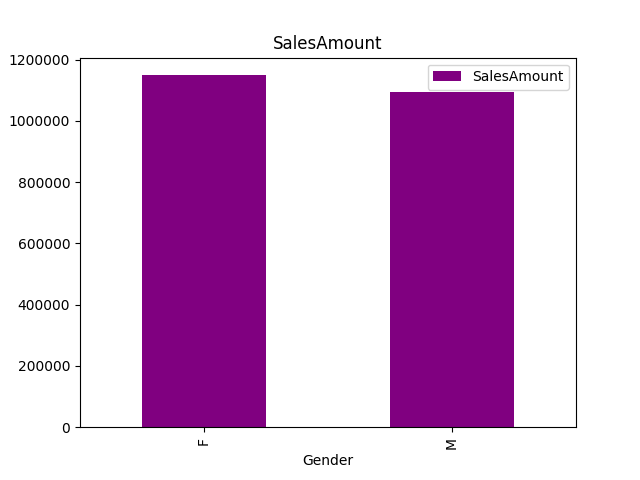

In [0]:
import pandas as pd

ppdf_salesbygender = ppdf_salesinfo_us.groupby(['Gender']).agg({'SalesAmount': 'sum'})
ppdf_salesbygender.plot(kind='bar', subplots=True, color='purple')
display()

In [0]:
ppdf_salesinfo_us.groupby('Gender')['SalesAmount'].sum()

Out[21]: Gender
F 1.148917e+06
M 1.092607e+06
Name: SalesAmount, dtype: float64

In [0]:
# import some more functions
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import avg
from pyspark.sql.functions import max, min
from pyspark.sql.functions import stddev

# Perform aggregations on the DataFrame
agg = spdf_salesinfo_us.agg(
    avg(spdf_salesinfo_us.SalesAmount).alias("avg_sales"), 
    stddev(spdf_salesinfo_us.SalesAmount).alias("stddev_sales"),
    min(spdf_salesinfo_us.SalesAmount).alias("min_sales"),
    max(spdf_salesinfo_us.SalesAmount).alias("max_sales"),
    countDistinct(spdf_salesinfo_us.ProductKey).alias("distinct_products"), 
    countDistinct(spdf_salesinfo_us['c.CustomerKey']).alias('distinct_customers')
)

# Convert the results to Pandas DataFrame
display(agg.toPandas())

avg_sales stddev_sales min_sales max_sales distinct_products distinct_customers 442.056903293286 843.4689075141443 3.99 2384.07 56 6086

In [0]:
%r
library(SparkR)

display(sql("select * from vsalesinfo_us"))

OrderDateKey DueDateKey CustomerKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey ProductCategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear CustomerKey CountryRegionCode CountryName StateProvinceCode StateProvinceName City PostalCode 20121119 20121201 27448 1 4 2071.4196 356 1 1 Bikes Mountain Bikes Mountain-200 M 40000.0 1 0 1117.8559 165.7136 N 1 Late Middle Bachelors 1 2-5 Miles 2012 2 November 11 2012 27448 US United States AZ Arizona Chandler 85225 20130403 20130415 25372 1 4 32.6 540 37 4 Accessories Tires and Tubes HL Road Tire F 40000.0 1 0 12.1924 2.608 N 1 Late Middle Graduate Degree 0 1-2 Miles 2012 4 April 4 2013 25372 US United States AZ Arizona Chandler 85225 20130729 20130810 12435 1 4 2319.99 355 1 1 Bikes Mountain Bikes Mountain-200 F 40000.0 1 0 1265.6195 185.5992 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130729 20130810 12435 1 4 21.98 485 30 4 Accessories Fenders Fender Set - Mountain F 40000.0 1 0 8.2205 1.7584 N 1 Golden Partial College 1 0-1 Miles 2013 1 July 7 2013 12435 US United States CA California Bell Gardens 90201 20130826 20130907 29273 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Late Middle Partial College 2 5-10 Miles 2013 1 August 8 2013 29273 US United States CA California Bellflower 90706 20130826 20130907 29272 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 100000.0 1 0 1.4923 0.3192 Y 1 Golden Partial College 2 5-10 Miles 2013 1 August 8 2013 29272 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 110000.0 1 0 9.3463 1.9992 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20131025 20131106 29243 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 110000.0 1 0 1.4923 0.3192 Y 1 Golden Bachelors 1 5-10 Miles 2013 2 October 10 2013 29243 US United States CA California Bellflower 90706 20130511 20130523 29112 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Middle Partial College 2 1-2 Miles 2012 4 May 5 2013 29112 US United States CA California Bellflower 90706 20131210 20131222 29050 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 40000.0 1 0 1.4923 0.3192 N 1 Middle Partial College 1 5-10 Miles 2013 2 December 12 2013 29050 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 24.99 539 37 4 Accessories Tires and Tubes ML Road Tire M 60000.0 1 0 9.3463 1.9992 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130811 20130823 28983 1 4 3.99 529 37 4 Accessories Tires and Tubes Road Tire Tube M 60000.0 1 0 1.4923 0.3192 N 0 Golden Bachelors 2 1-2 Miles 2013 1 August 8 2013 28983 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 742.35 569 3 1 Bikes Touring Bikes Touring-3000 F 70000.0 1 0 461.4448 59.388 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20130323 20130404 28844 1 4 8.99 479 28 4 Accessories Bottles and Cages Road Bottle Cage F 70000.0 1 0 3.3623 0.7192 Y 1 Late Middle Bachelors 0 2-5 Miles 2012 3 March 3 2013 28844 US United States CA California Bellflower 90706 20131203 20131215 28250 1 4 2384.07 574 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 2 2-5 Miles 2013 2 December 12 2013 28250 US United States CA California Bellflower 90706 20131221 20140102 28234 1 4 2384.07 575 3 1 Bikes Touring Bikes Touring-1000 M 100000.0 1 0 1481.9379 190.7256 Y 1 Late Middle Partial College 4 2-5 Miles 2013

In [0]:
spdf_salesinfo_us.drop('CustomerKey').createOrReplaceTempView('vsalesinfo_us')

In [0]:
%sql 

DROP TABLE IF EXISTS t_salesinfo_us

In [0]:
%sql

CREATE TABLE t_salesinfo_us as 
SELECT * FROM vsalesinfo_us

In [0]:
%sql 

SELECT MonthNumberOfYear, sum(SalesAmount) 
FROM t_salesinfo_us 
GROUP BY MonthNumberOfYear 
ORDER BY MonthNumberOfYear

MonthNumberOfYear sum(SalesAmount) 1 216773.93239999877 2 226616.37979999892 3 202524.5841999987 4 257305.0495999982 5 324322.8445999972 6 508779.4689999948 7 377676.97999999614 8 397342.2043999962 9 375334.11579999636 10 445671.1675999955 11 579351.2133999943 12 531415.9941999938

In [0]:
# Use the Spark CSV datasource with options specifying:
# - First line of file is a header
# - Automatically infer the schema of the data

spdf_sales = sqlContext.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/FactInternetSales.csv")
spdf_factreason = sqlContext.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/FactInternetSalesReason.csv")
spdf_dimreason = sqlContext.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/DimSalesReason.csv")


#sales.cache() # Cache data for faster reuse
spdf_sales = spdf_sales.dropna() # drop rows with missing values

In [0]:
spdf_sales.createOrReplaceTempView('vsalestemp')
spdf_factreason.createOrReplaceTempView('vfactreasontemp')
spdf_dimreason.createOrReplaceTempView('vdimreasontemp')

In [0]:
%sql

SELECT sum(SalesAmount) as TotalSales, ifnull(SalesReasonName, 'None') as SalesReason
FROM vsalestemp              s
LEFT JOIN vfactreasontemp   fr
ON (s.SalesOrderNumber = fr.SalesOrderNumber) and (s.SalesOrderLineNumber = fr.SalesOrderLineNumber)
LEFT JOIN vdimreasontemp    dr
ON (fr.SalesReasonKey = dr.SalesReasonKey)
GROUP BY ifnull(SalesReasonName, 'None')

TotalSales SalesReason 1694881.9816000017 Review 6928545.646300257 None 248483.34000000148 Other 5998122.099999864 Manufacturer 6361828.95280028 On Promotion 5549896.769999851 Quality 27475.819999999934 Television Advertisement 1.0975842560003698E7 Price

## PySpark User Defined Functions

In [0]:
%sql USE aw

In [0]:
%sql describe table t_salesinfo_us

col_name data_type comment OrderDateKey int null DueDateKey int null PromotionKey int null SalesTerritoryKey int null SalesAmount double null ProductKey int null ProductSubcategoryKey int null ProductCategoryKey int null Category string null Subcategory string null Model string null Gender string null Salary double null OrderQuantity int null DiscountAmount int null TotalProductCost double null TaxAmt double null HasChildren string null HomeOwner int null AgeBand string null Education string null NumberCarsOwned int null CommuteDistance string null FiscalYear int null FiscalQuarter int null Month string null MonthNumberOfYear int null CalendarYear int null CountryRegionCode string null CountryName string null StateProvinceCode string null StateProvinceName string null City string null PostalCode string null

In [0]:
%sql

SELECT instr(Model, 'Mount'), substring(Model, 1,2), translate(Model, 'o', 'X'), Model 
FROM aw.t_salesinfo_us LIMIT 2;

instr(Model, Mount) substring(Model, 1, 2) translate(Model, o, X) Model 1 Mo MXuntain-200 Mountain-200 0 HL HL RXad Tire HL Road Tire

In [0]:
spdf_salesinfo_us = spark.sql("select * from aw.t_salesinfo_us limit 3")

In [0]:
from pyspark.sql.functions import instr, translate, substring

display(
spdf_salesinfo_us.select(instr("Model", "Mount"), substring("Model",1,2), translate('Model', 'o', 'X'))
)

instr(Model, Mount) substring(Model, 1, 2) translate(Model, o, X) 1 Mo MXuntain-200 0 HL HL RXad Tire 1 Mo MXuntain-200

In [0]:
from pyspark.sql.types import DoubleType

def margin_precent_type(productcost, saleamt):
  return (saleamt - productcost) / saleamt

spark.udf.register("margin_percent", margin_precent_type, DoubleType())

Out[5]: <function __main__.margin_precent_type(productcost, saleamt)>

In [0]:
%sql 

SELECT margin_percent(TotalProductCost, SalesAmount) as gross_margin, TotalProductCost, SalesAmount 
FROM  aw.t_salesinfo_us LIMIT 2;

gross_margin TotalProductCost SalesAmount 0.4603430903135222 1117.8559 2071.4196 0.626 12.1924 32.6

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

margin_percent_udf = udf(margin_precent_type, DoubleType())

In [0]:
display(spdf_salesinfo_us.select("SalesAmount", "TotalProductCost", 
                                 margin_percent_udf("TotalProductCost",
                                 "SalesAmount").alias("MarginPercent")))

SalesAmount TotalProductCost MarginPercent 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 159.0 59.466 0.626 2319.99 1265.6195 0.45447200203449145 21.98 8.2205 0.6260009099181074 2294.99 1251.9813 0.45447200205665383 2294.99 1251.9813 0.45447200205665383 21.98 8.2205 0.6260009099181074 2319.99 1265.6195 0.45447200203449145 21.98 8.2205 0.6260009099181074 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 2319.99 1265.6195 0.45447200203449145 2319.99 1265.6195 0.45447200203449145 21.98 8.2205 0.6260009099181074 21.98 8.2205 0.6260009099181074 2294.99 1251.9813 0.45447200205665383 2319.99 1265.6195 0.45447200203449145 742.35 461.4448 0.37839994611706074 3.99 1.4923 0.6259899749373433 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 2294.99 1251.9813 0.45447200205665383 2294.99 1251.9813 0.45447200205665383 21.98 8.2205 0.6260009099181074 2294.99 1251.9813 0.45447200205665383 9.99 3.7363 0.625995995995996 4.99 1.8663 0.6259919839679359 9.99 3.7363 0.625995995995996 2294.99 1251.9813 0.45447200205665383 159.0 59.466 0.626 3.99 1.4923 0.6259899749373433 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 742.35 461.4448 0.37839994611706074 8.99 3.3623 0.6259955506117909 2294.99 1251.9813 0.45447200205665383 4.99 1.8663 0.6259919839679359 742.35 461.4448 0.37839994611706074 2319.99 1265.6195 0.45447200203449145 4.99 1.8663 0.6259919839679359 742.35 461.4448 0.37839994611706074 8.99 3.3623 0.6259955506117909 2319.99 1265.6195 0.45447200203449145 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 159.0 59.466 0.626 3.99 1.4923 0.6259899749373433 742.35 461.4448 0.37839994611706074 21.98 8.2205 0.6260009099181074 8.99 3.3623 0.6259955506117909 2319.99 1265.6195 0.45447200203449145 4.99 1.8663 0.6259919839679359 742.35 461.4448 0.37839994611706074 2294.99 1251.9813 0.45447200205665383 21.98 8.2205 0.6260009099181074 742.35 461.4448 0.37839994611706074 2294.99 1251.9813 0.45447200205665383 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 9.99 3.7363 0.625995995995996 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 4.99 1.8663 0.6259919839679359 2294.99 1251.9813 0.45447200205665383 9.99 3.7363 0.625995995995996 21.98 8.2205 0.6260009099181074 4.99 1.8663 0.6259919839679359 2319.99 1265.6195 0.45447200203449145 9.99 3.7363 0.625995995995996 4.99 1.8663 0.6259919839679359 159.0 59.466 0.626 3.99 1.4923 0.6259899749373433 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 2294.99 1251.9813 0.45447200205665383 2294.99 1251.9813 0.45447200205665383 9.99 3.7363 0.625995995995996 4.99 1.8663 0.6259919839679359 2294.99 1251.9813 0.45447200205665383 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 2319.99 1265.6195 0.45447200203449145 2319.99 1265.6195 0.45447200203449145 2294.99 1251.9813 0.45447200205665383 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 2319.99 1265.6195 0.45447200203449145 21.98 8.2205 0.6260009099181074 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 2319.99 1265.6195 0.45447200203449145 9.99 3.7363 0.625995995995996 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 4.99 1.8663 0.6259919839679359 2294.99 1251.9813 0.45447200205665383 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 3.99 1.4923 0.6259899749373433 3.99 1.4923 0.6259899749373433 4.99 1.8663 0.6259919839679359 742.35 461.44

In [0]:
from pyspark.sql.functions import udf

@udf("double")
def margin_precent_type_udf2(productcost, saleamt):
  return (saleamt - productcost) / saleamt

In [0]:
display(spdf_salesinfo_us.select("SalesAmount", "TotalProductCost", 
                                 margin_precent_type_udf2("TotalProductCost", 
                                 "SalesAmount").alias("MarginPercent")))

SalesAmount TotalProductCost MarginPercent 2071.4196 1117.8559 0.4603430903135222 32.6 12.1924 0.626 2319.99 1265.6195 0.45447200203449145

In [0]:
# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

## Pandas Dataframes

Good blog at: https://databricks.com/blog/2017/10/30/introducing-vectorized-udfs-for-pyspark.html

## Using an iterator and passing more than one column, i.e. a tuple. 

See link for more info: https://docs.microsoft.com/en-us/azure/databricks/spark/latest/spark-sql/udf-python-pandas

In [0]:
# When the UDF is called with more than one column,
# the input to the underlying function is an iterator of pd.Series tuple.

import pandas as pd

from pyspark.sql.functions import col, pandas_udf
        
@pandas_udf("double", PandasUDFType.SCALAR_ITER)        
def margin_precent_udf(batch_iter):
    for saleamt, productcost in batch_iter:
        yield (saleamt - productcost) / saleamt     
        
spdf_salesinfo_us.select("SalesAmount", "TotalProductCost", 
                         margin_precent_udf(col("SalesAmount"), col("TotalProductCost"))).show(3)        

+-----------+----------------+-------------------------------------------------+
SalesAmount|TotalProductCost|margin_precent_udf(SalesAmount, TotalProductCost)|
+-----------+----------------+-------------------------------------------------+
 3.99| 1.4923| 0.6259899749373433|
 4.99| 1.8663| 0.6259919839679359|
 3.99| 1.4923| 0.6259899749373433|
+-----------+----------------+-------------------------------------------------+
only showing top 3 rows

In [0]:
spdf_salesinfo_us2 = spark.sql("select * from aw.t_salesinfo_us")

Original Link: https://stackoverflow.com/questions/40006395/applying-udfs-on-groupeddata-in-pyspark-with-functioning-python-example

In [0]:
from pyspark.sql.functions import pandas_udf,PandasUDFType

from pyspark.sql.types import *

import pandas as pd

# Get a set of data to process...
spdf_salesinfo_us2 = spark.sql("select * from aw.t_salesinfo_us")

schema = StructType([
    StructField("SalesTerritoryKey", IntegerType()),
    StructField("avg_productcost", DoubleType()),
    StructField("avg_saleamount", DoubleType()),
    StructField("avg_profitmargin", DoubleType())
])

@pandas_udf(schema, functionType=PandasUDFType.GROUPED_MAP)
def avg_profit_margin(df):
    gr = df['SalesTerritoryKey'].iloc[0]
    pc = df.TotalProductCost.mean()
    sa = df.SalesAmount.mean()
    gm = (df.SalesAmount.mean() - df.TotalProductCost.mean()) / df.TotalProductCost.mean()
    return pd.DataFrame([[gr]+[pc]+[sa]+[gm]])

display(spdf_salesinfo_us2.groupby("SalesTerritoryKey"). \
        apply(avg_profit_margin).orderBy('SalesTerritoryKey'))

SalesTerritoryKey avg_productcost avg_saleamount avg_profitmargin 1 224.27343236494596 398.53778088835526 0.777017351925305 2 198.8790416666667 368.41484999999983 0.8524568849114097 3 149.62540999999996 270.43196 0.8073932763158348 4 268.87914793840883 473.3696972112916 0.7605295942090857 5 272.5338842105262 485.9420842105263 0.7830519886295941

See https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.GroupedData.apply

In [0]:
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql import Window

df = spark.createDataFrame(
    [(1, 1.0), (1, 2.0), (2, 3.0), (2, 5.0), (2, 10.0)],
    ("id", "v"))

@pandas_udf("double", PandasUDFType.GROUPED_AGG)
def profit_margin_udf(saleamt, productcost):
    return (saleamt.mean() - productcost.mean()) / saleamt.mean() 

w = Window \
    .partitionBy('SalesTerritoryKey') \
    .rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

spdf_profit = spdf_salesinfo_us2.withColumn('profit_margin', 
                                            profit_margin_udf(spdf_salesinfo_us2['SalesAmount'], 
                                            spdf_salesinfo_us2['TotalProductCost']).over(w))

display(spdf_profit.select('SalesTerritoryKey', 'SalesAmount', 'TotalProductCost', 'profit_margin'))

SalesTerritoryKey SalesAmount TotalProductCost profit_margin 1 32.6 12.1924 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 24.99 9.3463 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 24.99 9.3463 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 21.49 8.0373 0.43725929354794846 1 2384.07 1481.9379 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 2384.07 1481.9379 0.43725929354794846 1 2384.07 1481.9379 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 21.49 8.0373 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 2049.0982 1105.81 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 2071.4196 1117.8559 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 742.35 461.4448 0.43725929354794846 1 2049.0982 1105.81 0.43725929354794846 1 2384.07 1481.9379 0.43725929354794846 1 2071.4196 1117.8559 0.43725929354794846 1 2384.07 1481.9379 0.43725929354794846 1 2049.0982 1105.81 0.43725929354794846 1 8.99 3.3623 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 2049.0982 1105.81 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 28.99 10.8423 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 2384.07 1481.9379 0.43725929354794846 1 32.6 12.1924 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 32.6 12.1924 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 32.6 12.1924 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 32.6 12.1924 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 539.99 343.6496 0.43725929354794846 1 32.6 12.1924 0.43725929354794846 1 159.0 59.466 0.43725929354794846 1 539.99 343.6496 0.43725929354794846 1 21.49 8.0373 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 539.99 343.6496 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 539.99 343.6496 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 539.99 343.6496 0.43725929354794846 1 8.99 3.3623 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 21.98 8.2205 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 539.99 343.6496 0.43725929354794846 1 21.49 8.0373 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 8.99 3.3623 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 8.99 3.3623 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.43725929354794846 1 32.6 12.1924 0.43725929354794846 1 3.99 1.4923 0.43725929354794846 1 9.99 3.7363 0.43725929354794846 1 4.99 1.8663 0.4372592935